In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
# set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# http://www.cnblogs.com/x1957/archive/2012/06/02/2531503.html
# MNIST data: http://yann.lecun.com/exdb/mnist/
import struct

def read_mnist_images(filename):
    with open(filename , 'rb') as binfile:
        buf = binfile.read() 
        index = 0
        magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)
        index += struct.calcsize('>IIII')

        images = np.zeros(shape=(numImages, numRows*numColumns))
        for i in xrange(numImages):
            im = struct.unpack_from('>784B' ,buf, index)
            index += struct.calcsize('>784B')
            images[i] = np.array(im)
        
        return images


def read_mnist_labels(filename):
    with open(filename , 'rb') as binfile:
        buf = binfile.read() 
        index = 0
        magic, numLabels = struct.unpack_from('>II' , buf , index)
        index += struct.calcsize('>II')
        labels = np.zeros(shape=(numLabels))
        for i in xrange(numLabels):
            labels[i] = struct.unpack_from('>1B' ,buf, index)[0]
            index += struct.calcsize('>1B')
        
        return labels
    
# Load test images and labels for test
test_images = read_mnist_images( 'data/mnist/t10k-images.idx3-ubyte')
test_labels = read_mnist_labels( 'data/mnist/t10k-labels.idx1-ubyte')

# Load train images and labels
train_images = read_mnist_images( 'data/mnist/train-images.idx3-ubyte')
train_labels = read_mnist_labels( 'data/mnist/train-labels.idx1-ubyte')

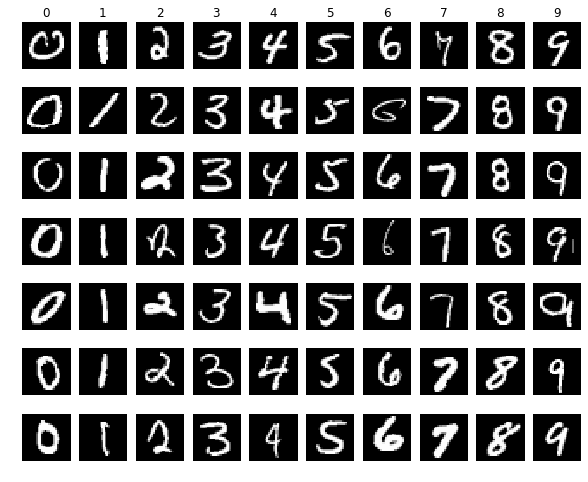

In [49]:
# Visualize some examples from the datasets
def vis_data(images, labels, sampler_per_label = 7):    
    for y in xrange(10):
        indices = np.flatnonzero(labels == y)
        indices = np.random.choice(indices, sampler_per_label, replace=False)
        for i, idx in enumerate(indices):
            plt_idx = i * 10 + y + 1
            plt.subplot(sampler_per_label, 10, plt_idx)
            plt.imshow(images[idx].reshape(28, 28).astype('uint8'), cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(str(y))
                
vis_data(train_images, train_labels)

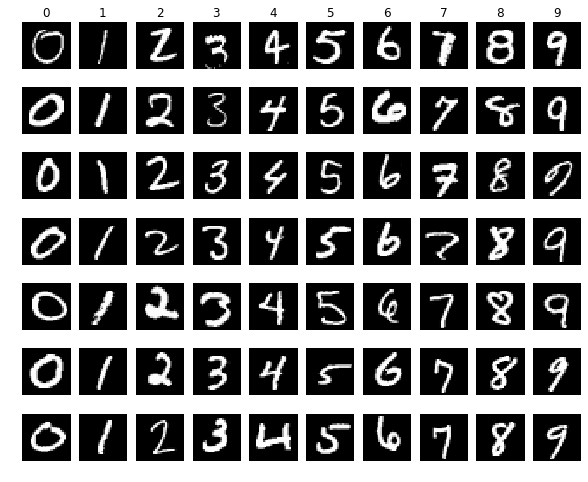

In [56]:
vis_data(test_images, test_labels)

In [3]:
import cv2

def train_and_test(params):
    # Train RTrees
    varType=np.array([cv2.CV_VAR_NUMERICAL]*train_images.shape[1] + [cv2.CV_VAR_CATEGORICAL]).astype('uint8')
    tree = cv2.RTrees()
    tree.train(trainData=train_images.astype('float32'),
               responses=train_labels.astype('int32'),
               tflag=cv2.CV_ROW_SAMPLE,
               varType=varType,
               params=params)

    # Predict
    labels = [tree.predict(im.astype('float32')) for im in test_images]
    labels = np.array(labels).astype('int32')

    # Compare with ground-true
    compares = (labels == test_labels.astype('int32'))
    correct_num = np.count_nonzero(compares)
    total_num = test_labels.shape[0]
    wrong_num = total_num - correct_num
    print total_num, correct_num, wrong_num
    print 'Correct rate: %f%%, %d/%d' % (correct_num * 100. / total_num, correct_num, total_num)
    print 'Wrong rate: %f%%, %d/%d' % (wrong_num * 100. / total_num, wrong_num, total_num)

In [4]:
# http://www.cnblogs.com/hrlnw/p/3850459.html
params = dict(
    max_depth=20,
    min_sample_count=50,
    regression_accuracy=0, # N/A here
    use_surrogates=False, # no missing data
    max_categories=15, # max number of categories (use sub-optimal algorithm for larger numbers)
    priors=[1]*10, # the array of priors
    calc_var_importance=False, # calculate variable importance
    nactive_vars=50, # number of variables randomly selected at node and used to find the best split(s).
    max_num_of_trees_in_the_forest=100, # max number of trees in the forest
    forest_accuracy=0.01, # forest accuracy
    termcrit_type=cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS,
)
train_and_test(params)

10000 9440 560
Correct rate: 94.400000%, 9440/10000
Wrong rate: 5.600000%, 560/10000


In [5]:
# http://www.cnblogs.com/hrlnw/p/3850459.html
params = dict(
    max_depth=15,
    min_sample_count=50,
    regression_accuracy=0, # N/A here
    use_surrogates=False, # no missing data
    max_categories=15, # max number of categories (use sub-optimal algorithm for larger numbers)
    priors=[1]*10, # the array of priors
    calc_var_importance=False, # calculate variable importance
    nactive_vars=50, # number of variables randomly selected at node and used to find the best split(s).
    max_num_of_trees_in_the_forest=100, # max number of trees in the forest
    forest_accuracy=0.01, # forest accuracy
    termcrit_type=cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS,
)
train_and_test(params)

10000 9438 562
Correct rate: 94.380000%, 9438/10000
Wrong rate: 5.620000%, 562/10000
